## Basic MLR

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os
import pandas as pd

base_path = os.path.abspath(os.path.join('..'))
file_path = os.path.join(base_path, 'datasets', 'cleaned_life_expectancy_data.csv')
cleaned = pd.read_csv(file_path)
X = cleaned.drop(columns=['Life Expectancy'])
y = cleaned['Life Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

Mean Squared Error (MLR): 15.495422569514567
R^2 Score (MLR): 0.835094090224285
Cross-validated MSE (MLR): 12.54040277661635


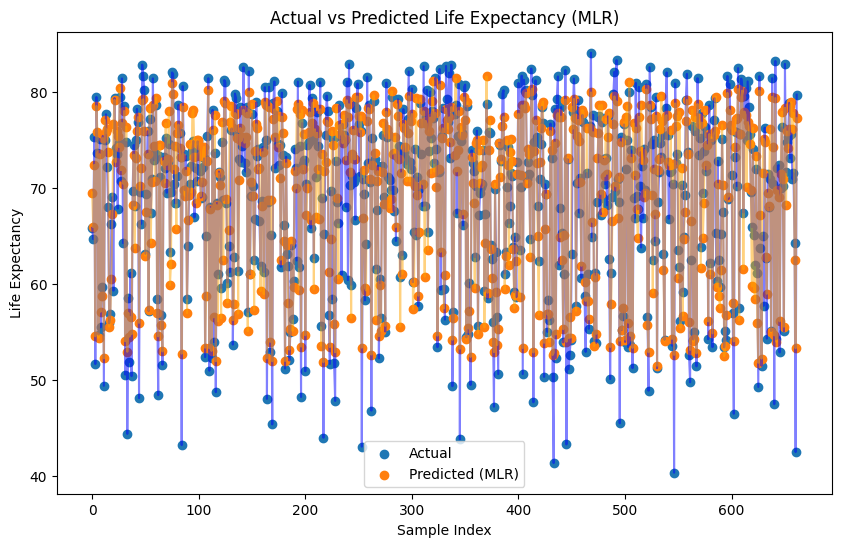

In [13]:
from sklearn.model_selection import cross_val_score

# Calculate the mean squared error
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
print(f'Mean Squared Error (MLR): {mse_mlr}')

r2_mlr = mlr.score(X_test, y_test)
print(f'R^2 Score (MLR): {r2_mlr}')

cv_scores_mse = cross_val_score(mlr, X, y, cv=10, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # Convert negative MSE to positive
print(f'Cross-validated MSE (MLR): {cv_scores_mse.mean()}')


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o')
plt.scatter(range(len(y_pred_mlr)), y_pred_mlr, label='Predicted (MLR)', marker='o')
plt.plot(range(len(y_test)), y_test, linestyle='-', color='blue', alpha=0.5)
plt.plot(range(len(y_pred_mlr)), y_pred_mlr, linestyle='-', color='orange', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy (MLR)')
plt.legend()
plt.show()

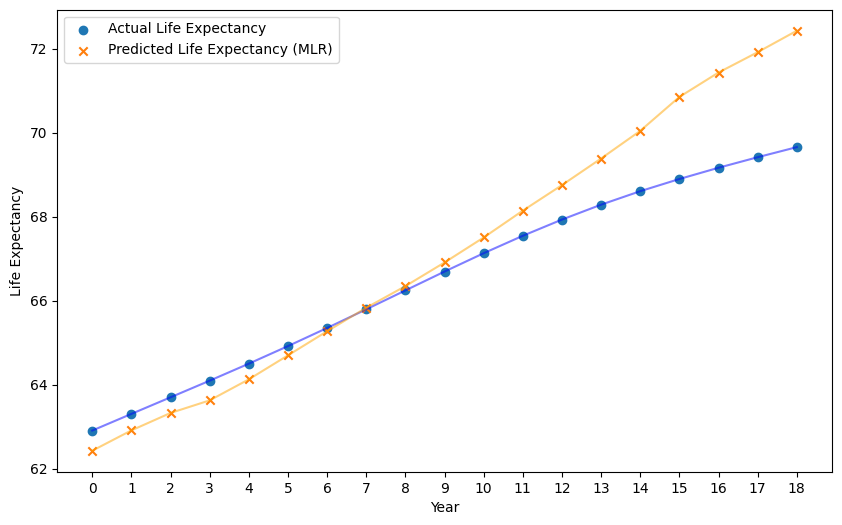

In [14]:
file_path_countries = os.path.join(base_path, 'datasets', 'cleaned_le_countries.csv')
cleaned_countries = pd.read_csv(file_path_countries)

# Filter the data for a specific country, e.g., 'CountryName'
country_name = 'India'  # Replace with the actual country name
country_data = cleaned_countries[cleaned_countries['Country Name'] == country_name]

country_data


country_X = country_data.drop(columns=['Country Name', 'Country Code', 'Life Expectancy', 'NonCommunicable'])
country_y_pred = mlr.predict(country_X)

# Plot the actual and predicted life expectancy for the specified country as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(country_data['Year'], country_data['Life Expectancy'], label='Actual Life Expectancy', marker='o')
plt.scatter(country_data['Year'], country_y_pred, label='Predicted Life Expectancy (MLR)', marker='x')
plt.plot(country_data['Year'], country_data['Life Expectancy'], linestyle='-', color='blue', alpha=0.5)
plt.plot(country_data['Year'], country_y_pred, linestyle='-', color='orange', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.xticks(country_data['Year'].astype(int))  # Ensure x-axis labels are integers
plt.legend()
plt.show()

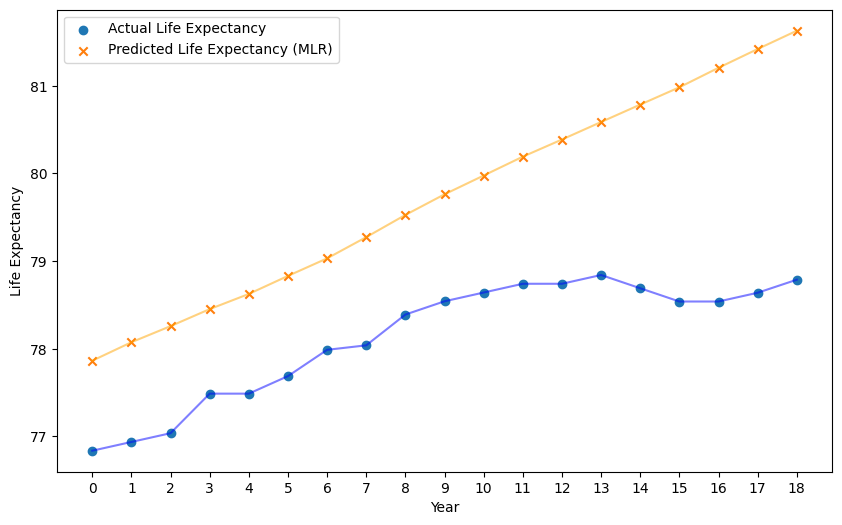

In [15]:
file_path_countries = os.path.join(base_path, 'datasets', 'cleaned_le_countries.csv')
cleaned_countries = pd.read_csv(file_path_countries)

# Filter the data for a specific country, e.g., 'CountryName'
country_name = 'United States'  # Replace with the actual country name
country_data = cleaned_countries[cleaned_countries['Country Name'] == country_name]

country_data


country_X = country_data.drop(columns=['Country Name', 'Country Code', 'Life Expectancy', 'NonCommunicable'])
country_y_pred = mlr.predict(country_X)

# Plot the actual and predicted life expectancy for the specified country as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(country_data['Year'], country_data['Life Expectancy'], label='Actual Life Expectancy', marker='o')
plt.scatter(country_data['Year'], country_y_pred, label='Predicted Life Expectancy (MLR)', marker='x')
plt.plot(country_data['Year'], country_data['Life Expectancy'], linestyle='-', color='blue', alpha=0.5)
plt.plot(country_data['Year'], country_y_pred, linestyle='-', color='orange', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.xticks(country_data['Year'].astype(int))  # Ensure x-axis labels are integers
plt.legend()
plt.show()